## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape

(50000, 3072)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0713 15:52:06.514913 20184 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 15:52:06.603675 20184 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 15:52:06.626614 20184 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 15:53:45.996929 20184 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 15:53:46.008862 20184 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 15:54:38.038726 20184 deprecation.py:323] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 15:54:38.186365 20184 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.9279 - acc: 0.3039 - val_loss: 1.7752 - val_acc: 0.3658
Epoch 2/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.7026 - acc: 0.3909 - val_loss: 1.6393 - val_acc: 0.4149
Epoch 3/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.6260 - acc: 0.4184 - val_loss: 1.5960 - val_acc: 0.4336
Epoch 4/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.5572 - acc: 0.4411 - val_loss: 1.5275 - val_acc: 0.4541
Epoch 5/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.4975 - acc: 0.4648 - val_loss: 1.5361 - val_acc: 0.4569
Epoch 6/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.4630 - acc: 0.4750 - val_loss: 1.4928 - val_acc: 0.4666
Epoch 7/500
50000/50000 [==============================] - 11s 220us/step - loss: 1.4380 - acc: 0.4868 - val_l

Epoch 59/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.5412 - acc: 0.8058 - val_loss: 1.9977 - val_acc: 0.5151
Epoch 60/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.5261 - acc: 0.8130 - val_loss: 2.0580 - val_acc: 0.5107
Epoch 61/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.5094 - acc: 0.8181 - val_loss: 2.0740 - val_acc: 0.5180
Epoch 62/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.5081 - acc: 0.8185 - val_loss: 2.0137 - val_acc: 0.5129
Epoch 63/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.5047 - acc: 0.8182 - val_loss: 2.0793 - val_acc: 0.5162
Epoch 64/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.4991 - acc: 0.8205 - val_loss: 2.1265 - val_acc: 0.5087
Epoch 65/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.4886 - acc: 0.8245 - val_loss: 2.1431 - val_acc: 0.5059
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.2451 - acc: 0.9107 - val_loss: 3.3462 - val_acc: 0.5010
Epoch 118/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.2370 - acc: 0.9147 - val_loss: 3.4090 - val_acc: 0.5062
Epoch 119/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.2361 - acc: 0.9150 - val_loss: 3.4762 - val_acc: 0.4913
Epoch 120/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.2350 - acc: 0.9161 - val_loss: 3.3207 - val_acc: 0.5032
Epoch 121/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.2377 - acc: 0.9142 - val_loss: 3.4348 - val_acc: 0.4962
Epoch 122/500
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2329 - acc: 0.9149 - val_loss: 3.4262 - val_acc: 0.5038
Epoch 123/500
50000/50000 [==============================] - 60s 1ms/step - loss: 0.2198 - acc: 0.9204 - val_loss: 3.5813 - val_acc: 0.4978
Epoch 124/

50000/50000 [==============================] - 13s 254us/step - loss: 0.1992 - acc: 0.9289 - val_loss: 4.0934 - val_acc: 0.4952
Epoch 175/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.1505 - acc: 0.9464 - val_loss: 4.0595 - val_acc: 0.5013
Epoch 176/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.1376 - acc: 0.9507 - val_loss: 4.1206 - val_acc: 0.4972
Epoch 177/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.1663 - acc: 0.9409 - val_loss: 4.1289 - val_acc: 0.4997
Epoch 178/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1464 - acc: 0.9481 - val_loss: 4.1276 - val_acc: 0.5021
Epoch 179/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.1664 - acc: 0.9417 - val_loss: 4.1050 - val_acc: 0.5049
Epoch 180/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.2167 - acc: 0.9260 - val_loss: 4.0677 - val_acc: 0.4956
Epoch 181/500
50000/

Epoch 231/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.1128 - acc: 0.9613 - val_loss: 4.5083 - val_acc: 0.4955
Epoch 232/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.1109 - acc: 0.9607 - val_loss: 4.4436 - val_acc: 0.5023
Epoch 233/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.0993 - acc: 0.9658 - val_loss: 4.6108 - val_acc: 0.4931
Epoch 234/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.2335 - acc: 0.9243 - val_loss: 4.4667 - val_acc: 0.4980
Epoch 235/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.1213 - acc: 0.9583 - val_loss: 4.5303 - val_acc: 0.4998
Epoch 236/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0860 - acc: 0.9710 - val_loss: 4.5026 - val_acc: 0.5002
Epoch 237/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.0822 - acc: 0.9712 - val_loss: 4.5855 - val_acc: 0.5008
Epoch 

50000/50000 [==============================] - 15s 307us/step - loss: 0.1181 - acc: 0.9590 - val_loss: 4.6766 - val_acc: 0.4956
Epoch 289/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.0782 - acc: 0.9730 - val_loss: 4.7531 - val_acc: 0.4980
Epoch 290/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.0505 - acc: 0.9828 - val_loss: 4.7555 - val_acc: 0.5025
Epoch 291/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.0464 - acc: 0.9847 - val_loss: 4.6205 - val_acc: 0.5067
Epoch 292/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.2393 - acc: 0.9267 - val_loss: 4.6968 - val_acc: 0.4949
Epoch 293/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.1666 - acc: 0.9462 - val_loss: 4.5722 - val_acc: 0.5028
Epoch 294/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.1285 - acc: 0.9568 - val_loss: 4.7705 - val_acc: 0.4993
Epoch 295/500
50000/

50000/50000 [==============================] - 12s 231us/step - loss: 0.2831 - acc: 0.9186 - val_loss: 5.0073 - val_acc: 0.4917
Epoch 346/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.1545 - acc: 0.9501 - val_loss: 4.8418 - val_acc: 0.4987
Epoch 347/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.0524 - acc: 0.9825 - val_loss: 4.8207 - val_acc: 0.5066
Epoch 348/500
50000/50000 [==============================] - 12s 241us/step - loss: 0.0710 - acc: 0.9764 - val_loss: 4.9466 - val_acc: 0.4978
Epoch 349/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.0841 - acc: 0.9718 - val_loss: 4.9554 - val_acc: 0.4928
Epoch 350/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.0759 - acc: 0.9735 - val_loss: 4.9239 - val_acc: 0.5015
Epoch 351/500
50000/50000 [==============================] - 16s 315us/step - loss: 0.0924 - acc: 0.9692 - val_loss: 5.0242 - val_acc: 0.4921
Epoch 352/500
50000/

50000/50000 [==============================] - 11s 224us/step - loss: 0.0585 - acc: 0.9802 - val_loss: 5.0207 - val_acc: 0.5046
Epoch 403/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.0573 - acc: 0.9805 - val_loss: 5.1387 - val_acc: 0.5001
Epoch 404/500
50000/50000 [==============================] - 12s 231us/step - loss: 0.1042 - acc: 0.9668 - val_loss: 5.0426 - val_acc: 0.4944
Epoch 405/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.1289 - acc: 0.9593 - val_loss: 5.0692 - val_acc: 0.4974
Epoch 406/500
50000/50000 [==============================] - 11s 230us/step - loss: 0.1095 - acc: 0.9641 - val_loss: 4.9835 - val_acc: 0.5024
Epoch 407/500
50000/50000 [==============================] - 11s 229us/step - loss: 0.0605 - acc: 0.9793 - val_loss: 5.0864 - val_acc: 0.4985
Epoch 408/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.0449 - acc: 0.9844 - val_loss: 5.1326 - val_acc: 0.4999
Epoch 409/500
50000/

ResourceExhaustedError: OOM when allocating tensor with shape[3072,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node training/Adam/Square}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


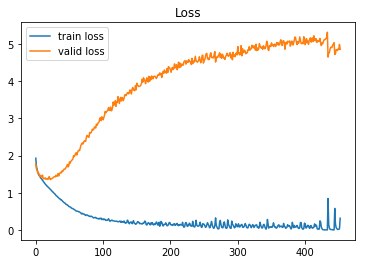

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()



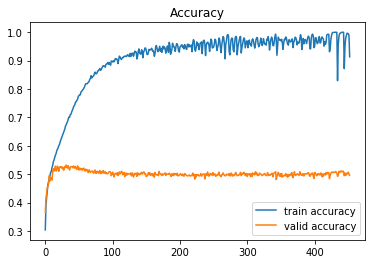

In [11]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [12]:
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.0719 - acc: 0.9768 - val_loss: 4.8207 - val_acc: 0.5004
Epoch 2/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0432 - acc: 0.9875 - val_loss: 4.7889 - val_acc: 0.5033
Epoch 3/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.0332 - acc: 0.9910 - val_loss: 4.7707 - val_acc: 0.5043
Epoch 4/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0275 - acc: 0.9931 - val_loss: 4.7605 - val_acc: 0.5053
Epoch 5/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0237 - acc: 0.9943 - val_loss: 4.7546 - val_acc: 0.5060
Epoch 6/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.0211 - acc: 0.9954 - val_loss: 4.7515 - val_acc: 0.5056
Epoch 7/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.0191 - acc: 0.9962 - val_loss: 4

50000/50000 [==============================] - 7s 141us/step - loss: 0.0065 - acc: 0.9997 - val_loss: 4.8027 - val_acc: 0.5087
Epoch 60/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0064 - acc: 0.9997 - val_loss: 4.8037 - val_acc: 0.5086
Epoch 61/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0064 - acc: 0.9997 - val_loss: 4.8046 - val_acc: 0.5084
Epoch 62/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0064 - acc: 0.9997 - val_loss: 4.8056 - val_acc: 0.5085
Epoch 63/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0063 - acc: 0.9998 - val_loss: 4.8065 - val_acc: 0.5087
Epoch 64/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0063 - acc: 0.9997 - val_loss: 4.8076 - val_acc: 0.5089
Epoch 65/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0063 - acc: 0.9997 - val_loss: 4.8086 - val_acc: 0.5087
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 136us/step - loss: 0.0050 - acc: 0.9998 - val_loss: 4.8508 - val_acc: 0.5083
Epoch 118/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0050 - acc: 0.9999 - val_loss: 4.8515 - val_acc: 0.5085
Epoch 119/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0050 - acc: 0.9998 - val_loss: 4.8521 - val_acc: 0.5086 lo
Epoch 120/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0049 - acc: 0.9999 - val_loss: 4.8529 - val_acc: 0.5084
Epoch 121/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0049 - acc: 0.9998 - val_loss: 4.8535 - val_acc: 0.5086
Epoch 122/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.0049 - acc: 0.9999 - val_loss: 4.8542 - val_acc: 0.5088
Epoch 123/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0049 - acc: 0.9999 - val_loss: 4.8549 - val_acc: 0.5087
Epoch 124/500
50000/5000

50000/50000 [==============================] - 9s 180us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.8829 - val_acc: 0.5095
Epoch 169/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.8835 - val_acc: 0.5095
Epoch 170/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.8840 - val_acc: 0.5095
Epoch 171/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.8847 - val_acc: 0.5095
Epoch 172/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.8852 - val_acc: 0.5095
Epoch 173/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.8857 - val_acc: 0.5095
Epoch 174/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.0042 - acc: 0.9999 - val_loss: 4.8862 - val_acc: 0.5095
Epoch 175/500
50000/50000 

50000/50000 [==============================] - 9s 186us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 4.9137 - val_acc: 0.5099
Epoch 227/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 4.9142 - val_acc: 0.5099
Epoch 228/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 4.9147 - val_acc: 0.5100
Epoch 229/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 4.9152 - val_acc: 0.5099
Epoch 230/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 4.9157 - val_acc: 0.5099
Epoch 231/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.0037 - acc: 0.9999 - val_loss: 4.9162 - val_acc: 0.5096
Epoch 232/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0037 - acc: 0.9999 - val_loss: 4.9167 - val_acc: 0.5102
Epoch 233/500
50000/50000 [

50000/50000 [==============================] - 9s 182us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9404 - val_acc: 0.5105
Epoch 285/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9408 - val_acc: 0.5104
Epoch 286/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9413 - val_acc: 0.5103
Epoch 287/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9417 - val_acc: 0.5104
Epoch 288/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9421 - val_acc: 0.5102
Epoch 289/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9426 - val_acc: 0.5102
Epoch 290/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0034 - acc: 0.9999 - val_loss: 4.9430 - val_acc: 0.5102
Epoch 291/500
50000/50000

50000/50000 [==============================] - 8s 170us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9644 - val_acc: 0.5112
Epoch 343/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9648 - val_acc: 0.5110
Epoch 344/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9653 - val_acc: 0.5109
Epoch 345/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9656 - val_acc: 0.5112
Epoch 346/500
50000/50000 [==============================] - 9s 187us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9660 - val_acc: 0.5113
Epoch 347/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9664 - val_acc: 0.5111
Epoch 348/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 4.9668 - val_acc: 0.5113
Epoch 349/500
50000/50000 [

50000/50000 [==============================] - 10s 209us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 4.9857 - val_acc: 0.5115
Epoch 401/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 4.9861 - val_acc: 0.5114
Epoch 402/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 4.9864 - val_acc: 0.5116
Epoch 403/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 4.9868 - val_acc: 0.5116
Epoch 404/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 4.9872 - val_acc: 0.5115
Epoch 405/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 4.9875 - val_acc: 0.5116
Epoch 406/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 4.9878 - val_acc: 0.5116
Epoch 407/500
50000/50

50000/50000 [==============================] - 8s 157us/step - loss: 0.0027 - acc: 0.9999 - val_loss: 5.0055 - val_acc: 0.5114
Epoch 459/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.0027 - acc: 0.9999 - val_loss: 5.0058 - val_acc: 0.5115
Epoch 460/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.0026 - acc: 0.9999 - val_loss: 5.0062 - val_acc: 0.5113
Epoch 461/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.0026 - acc: 0.9999 - val_loss: 5.0065 - val_acc: 0.5115
Epoch 462/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.0026 - acc: 0.9999 - val_loss: 5.0069 - val_acc: 0.5114
Epoch 463/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0026 - acc: 0.9999 - val_loss: 5.0071 - val_acc: 0.5114
Epoch 464/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.0026 - acc: 0.9999 - val_loss: 5.0075 - val_acc: 0.5111
Epoch 465/500
50000/50000 [

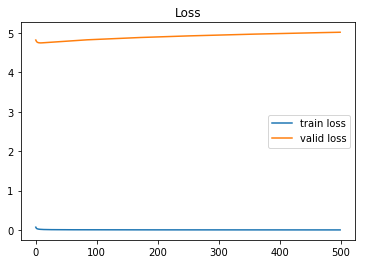

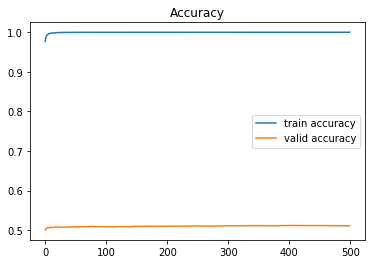

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()